<a href="https://colab.research.google.com/github/Cloudum08/DSBDA-Lab/blob/main/DSBDAL_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Implement **logistic regression** using Python/R to perform classification on
Social_Network_Ads.csv dataset.
2. Compute Confusion matrix to find TP, FP, TN, FN, Accuracy, Error rate, Precision, Recall on the given dataset.

In [ ]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

Loading the Dataset, checking for null values and preprocessing data

In [ ]:
df = pd.read_csv ('/content/Social_Network_Ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [ ]:
df.shape

(400, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [ ]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
df.isnull()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
395,False,False,False,False,False
396,False,False,False,False,False
397,False,False,False,False,False
398,False,False,False,False,False


In [ ]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [ ]:
df['Gender'].value_counts()

Female    204
Male      196
Name: Gender, dtype: int64

In [ ]:
from sklearn import preprocessing
df['Gender'].unique()


array(['Male', 'Female'], dtype=object)

In [ ]:
label_encoder = preprocessing.LabelEncoder()
df['Gender']= label_encoder.fit_transform(df['Gender'])
df['Gender'].unique()

array([1, 0])

In [ ]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0
...,...,...,...,...,...
395,15691863,0,46,41000,1
396,15706071,1,51,23000,1
397,15654296,0,50,20000,1
398,15755018,1,36,33000,0


Split dependent (y) variable and independent (x) variables as y = mx + c

In [ ]:
x = df.drop(['Purchased'], axis = 1)
y = df['Purchased']

Splitting data to training and testing dataset.

In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size =0.2,random_state = 0)

Use Logistic regression( Train the Machine ) to Create Model

In [ ]:
# import the class
from sklearn.linear_model import LogisticRegression
# instantiate the model (using the default parameters)
logreg = LogisticRegression()
# fit the model with data
model = logreg.fit(xtrain,ytrain)



Predict the y_pred for all values of train_x and test_x

In [ ]:
ytrain_pred = logreg.predict(xtrain)
ytest_pred = logreg.predict(xtest)

Evaluate the performance of Model for train_y and test_y

In [ ]:
df1 = pd.DataFrame(ytrain_pred,ytrain)
df2 = pd.DataFrame(ytest_pred,ytest)

In [ ]:
df1

,0
Purchased,
1,1
0,0
0,0
0,0
1,0
...,...
1,0
0,0
0,0


In [ ]:
df2

,0
Purchased,
0,0
0,0
0,0
0,0
0,0
...,...
0,0
0,0
0,0


Calculate the required evaluation parameters

In [ ]:
from sklearn.metrics import precision_score, confusion_matrix, accuracy_score, recall_score, classification_report
cm = confusion_matrix(ytest, ytest_pred)
cm

array([[56,  2],
       [12, 10]])

In [ ]:
accuracy = accuracy_score(ytest, ytest_pred)
print(accuracy)

precision =precision_score(ytest, ytest_pred, average='micro')
print(precision)

recall = recall_score(ytest, ytest_pred, average='micro')
print(recall)

0.825
0.825
0.825


In [ ]:
print (classification_report(ytest, ytest_pred))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89        58
           1       0.83      0.45      0.59        22

    accuracy                           0.82        80
   macro avg       0.83      0.71      0.74        80
weighted avg       0.83      0.82      0.81        80



Plotting the logistic regression model

<Axes: >

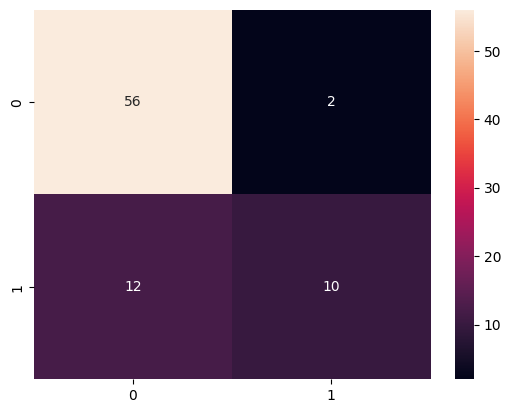

In [ ]:
import seaborn as sns
sns.heatmap(cm, annot=True,)